# Data Analysis

Referências: 
- [Exploratory Data Analysis for Natural Language Processing: A Complete Guide to Python Tools](https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools)
- [Word Cloud showing several ' amongst words and not sure why](https://stackoverflow.com/questions/67148707/word-cloud-showing-several-amongst-words-and-not-sure-why)
- [Sentiment Analysis of App Reviews: A Comparison of BERT, spaCy, TextBlob, and NLTK](https://francisgichere.medium.com/sentiment-analysis-of-app-reviews-a-comparison-of-bert-spacy-textblob-and-nltk-9016054d54dc)
- [Sentiment Classification using SpaCy](https://www.kaggle.com/code/krutarthhd/sentiment-classification-using-spacy)
- [Building a Sentiment Analysis Model Using spaCy: A Practical Guide](https://mysteryweevil.medium.com/building-a-sentiment-analysis-model-using-spacy-a-practical-guide-261d881e5dcb)
- [spacytextblob](https://spacy.io/universe/project/spacy-textblob)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
import pandas as pd
import pprint
import seaborn as sns


from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
from string import punctuation
from transformers import BertTokenizer
from wordcloud import WordCloud

In [2]:
BERTIMBAU_MODEL = "neuralmind/bert-base-portuguese-cased"

In [3]:
reviews_df = pd.read_csv("../data_preparation/glassdoor_reviews_annotated.csv")

In [4]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",15 de dez. de 2023,5.0,1,0
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,15 de dez. de 2023,5.0,0,1
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,11 de mar. de 2023,4.0,1,0
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,11 de mar. de 2023,4.0,-1,0
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,24 de fev. de 2022,1.0,0,1


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        2566 non-null   int64  
 1   company          2566 non-null   object 
 2   employee_role    2566 non-null   object 
 3   employee_detail  2566 non-null   object 
 4   review_text      2566 non-null   object 
 5   review_date      2566 non-null   object 
 6   star_rating      2566 non-null   float64
 7   sentiment        2566 non-null   int64  
 8   annotated        2566 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 180.6+ KB


In [6]:
len(reviews_df["company"].value_counts())

22

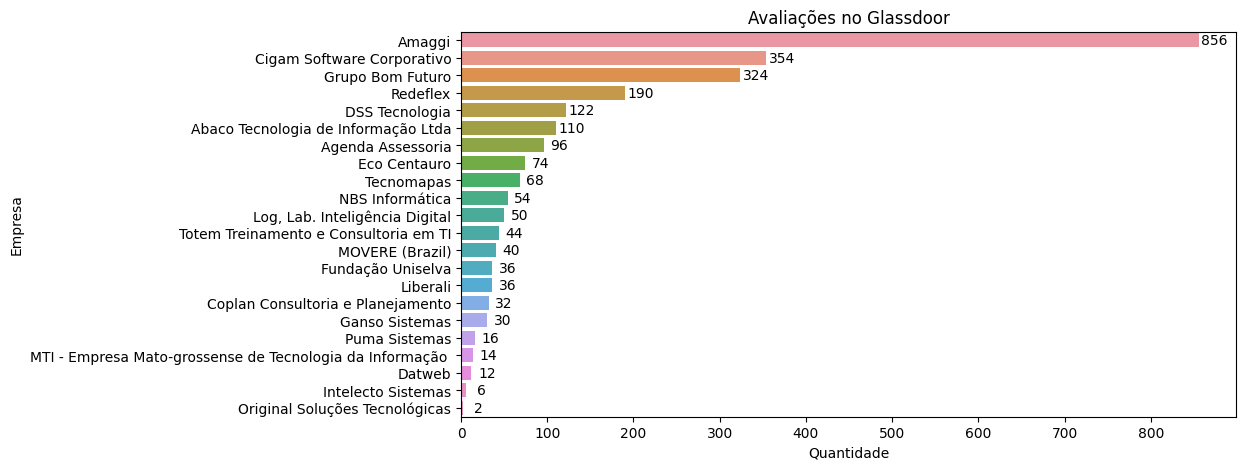

In [7]:
reviews_per_company_df = reviews_df["company"].value_counts().reset_index()
# reviews_per_company_df.columns = ["Empresa", "Quantidade de Avaliações"]

ax = plt.subplots(1, figsize=(10, 5))
ax = sns.barplot(data=reviews_per_company_df, x="count", y="company", orient="h")
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",
        (p.get_width() + 10, p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        xytext=(5, 0),
        textcoords="offset points",
    )


ax.set_title("Avaliações no Glassdoor")

ax.set_xlabel("Quantidade")
ax.set_ylabel("Empresa")
plt.show()

## Analyzing review_text statistics

### Word Frequency

In [8]:
reviews_df["review_text_length"] = reviews_df["review_text"].str.len()

In [9]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,review_text_length
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",15 de dez. de 2023,5.0,1,0,60
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,15 de dez. de 2023,5.0,0,1,30
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,11 de mar. de 2023,4.0,1,0,46
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,11 de mar. de 2023,4.0,-1,0,45
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,24 de fev. de 2022,1.0,0,1,45


In [10]:
def plot_reviews_text_length_histogram(reviews_df):
    bins = 40

    axes = sns.histplot(data=reviews_df, x="review_text_length", bins=bins)

    plt.xlabel("Review Text Length")
    plt.ylabel("Frequency")
    plt.title("Histogram of Review Text")
    plt.show()

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


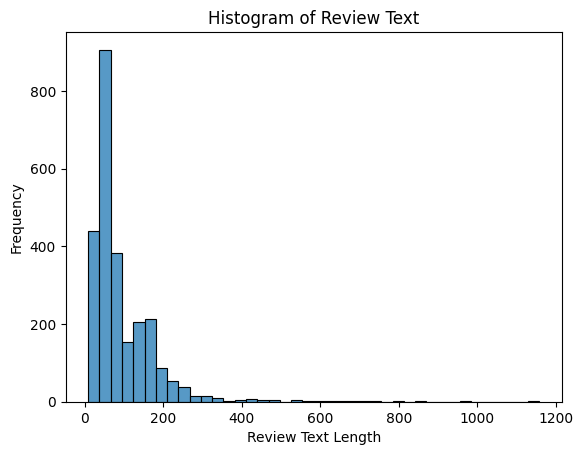

In [11]:
plot_reviews_text_length_histogram(reviews_df)

O Histograma mostra que a maior parte dos reviews tem cerca de 200 caracteres.

In [12]:
reviews_df[reviews_df["review_text"].str.len() > 1000]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,review_text_length
1313,32305292,Cigam Software Corporativo,Desenvolvedor De Software,"Ex-funcionário(a), mais de 3 anos",Diversos motivos me fazem criticar a CIGAM Pro...,10 de mar. de 2020,1.0,-1,0,1157


In [13]:
longest_text = reviews_df[reviews_df["review_text"].str.len() > 1000][
    "review_text"
].iloc[0]

In [14]:
len(longest_text)

1157

In [15]:
pprint.pprint(longest_text)

('Diversos motivos me fazem criticar a CIGAM Prodaly, mas acredito que os '
 'maiores são: pressão gigantesca da gerência (trabalhar madrugadas, finais de '
 'semana, etc); gerência não ouve os seus funcionários - sempre toma decisões '
 'por conta própria e que quase sempre se mostraram ruins ou erradas; '
 'linguagem de programação extremamente de nicho (linguagem magic), ou seja, '
 'se quiser seguir carreira nessa linguagem vai se aposentar na Prodaly, e se '
 'não bastasse ser de nicho, é uma linguagem defasada que pouco vai te ajudar '
 'no mercado de trabalho fora dali; gerência faz diversas reuniões apenas para '
 'esculachar os funcionários e dizer como eles são incompetentes; salários '
 'abaixo ou na média do mercado (só vai subir se você decidir que a empresa '
 'vale mais que sua vida e puxar o saco da gerência, pois é esse tipo de '
 'pessoa que eles querem contratar); Não pode utilizar fone de ouvido para '
 'programar; intervalo restritos há 10min, como se fosse uma esp

### Token frequency

In [16]:
tokenizer = BertTokenizer.from_pretrained(BERTIMBAU_MODEL)

In [17]:
def count_tokens(review_text):
    tokens = tokenizer.tokenize(review_text)
    return len(tokens)

In [18]:
reviews_df["count_tokens"] = reviews_df["review_text"].apply(count_tokens)

In [19]:
reviews_df["count_tokens"].max()

257

In [20]:
reviews_df[reviews_df.index == reviews_df["count_tokens"].idxmax()]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,review_text_length,count_tokens
1313,32305292,Cigam Software Corporativo,Desenvolvedor De Software,"Ex-funcionário(a), mais de 3 anos",Diversos motivos me fazem criticar a CIGAM Pro...,10 de mar. de 2020,1.0,-1,0,1157,257


In [21]:
reviews_df[reviews_df.index == reviews_df["count_tokens"].idxmax()]["review_text"].values[0]

'Diversos motivos me fazem criticar a CIGAM Prodaly, mas acredito que os maiores são: pressão gigantesca da gerência (trabalhar madrugadas, finais de semana, etc); gerência não ouve os seus funcionários - sempre toma decisões por conta própria e que quase sempre se mostraram ruins ou erradas; linguagem de programação extremamente de nicho (linguagem magic), ou seja, se quiser seguir carreira nessa linguagem vai se aposentar na Prodaly, e se não bastasse ser de nicho, é uma linguagem defasada que pouco vai te ajudar no mercado de trabalho fora dali; gerência faz diversas reuniões apenas para esculachar os funcionários e dizer como eles são incompetentes; salários abaixo ou na média do mercado (só vai subir se você decidir que a empresa vale mais que sua vida e puxar o saco da gerência, pois é esse tipo de pessoa que eles querem contratar); Não pode utilizar fone de ouvido para programar; intervalo restritos há 10min, como se fosse uma espécie de escola - sendo que trabalham com tecnolog

In [22]:
tokens = tokenizer.tokenize(
    reviews_df[reviews_df.index == reviews_df["count_tokens"].idxmax()][
        "review_text"
    ].values[0]
)

In [23]:
print(tokens)

['Diversos', 'motivos', 'me', 'fazem', 'critica', '##r', 'a', 'C', '##IG', '##AM', 'Pro', '##dal', '##y', ',', 'mas', 'acred', '##ito', 'que', 'os', 'maiores', 'são', ':', 'pressão', 'gigantes', '##ca', 'da', 'ger', '##ência', '(', 'trabalhar', 'madrugada', '##s', ',', 'finais', 'de', 'semana', ',', 'etc', ')', ';', 'ger', '##ência', 'não', 'ouve', 'os', 'seus', 'funcionários', '-', 'sempre', 'toma', 'decisões', 'por', 'conta', 'própria', 'e', 'que', 'quase', 'sempre', 'se', 'mostraram', 'ru', '##ins', 'ou', 'er', '##radas', ';', 'linguagem', 'de', 'programação', 'extremamente', 'de', 'nic', '##ho', '(', 'linguagem', 'mag', '##ic', ')', ',', 'ou', 'seja', ',', 'se', 'quis', '##er', 'seguir', 'carreira', 'nessa', 'linguagem', 'vai', 'se', 'aposentar', 'na', 'Pro', '##dal', '##y', ',', 'e', 'se', 'não', 'bas', '##tasse', 'ser', 'de', 'nic', '##ho', ',', 'é', 'uma', 'linguagem', 'def', '##asa', '##da', 'que', 'pouco', 'vai', 'te', 'ajudar', 'no', 'mercado', 'de', 'trabalho', 'fora', 'dali

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count_tokens', ylabel='Count'>

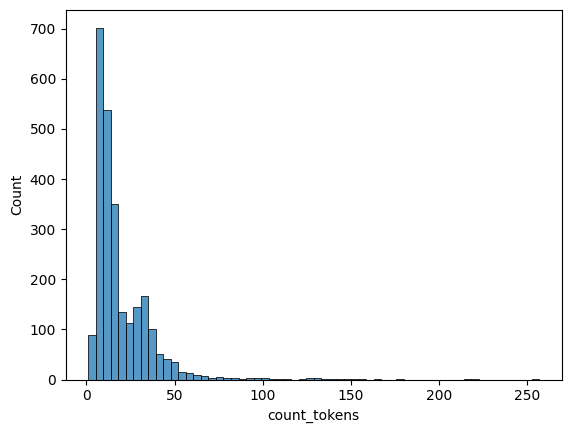

In [24]:
sns.histplot(data=reviews_df, x="count_tokens", bins=60)

<Axes: ylabel='count_tokens'>

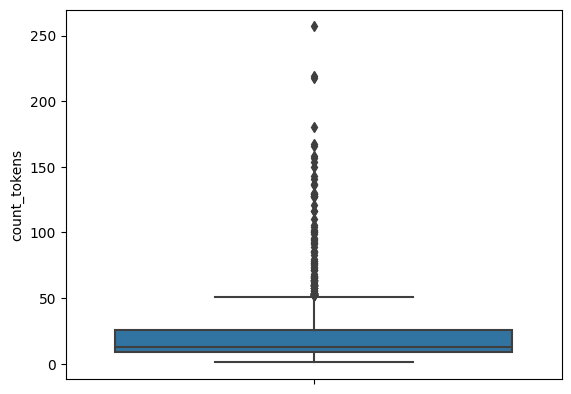

In [25]:
sns.boxplot(y=reviews_df["count_tokens"])

### Reviews' word number

In [26]:
def plot_reviews_word_number_histogram(review_text_series):
    word_counts = review_text_series.str.split().map(lambda x: len(x))
    sns.histplot(word_counts, bins=30, kde=False)

    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.title("Histogram of Word Counts")
    plt.show()

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


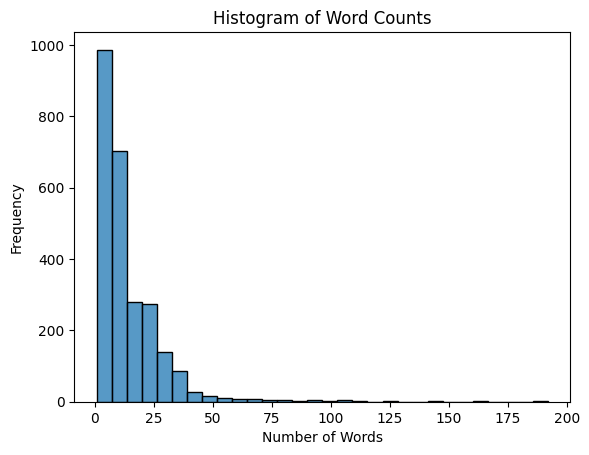

In [27]:
plot_reviews_word_number_histogram(reviews_df["review_text"])

O gráfico mostra que a maior parte dos reviews tem até 50 palavras

In [28]:
len(longest_text.split())

192

### Reviews' word average

In [29]:
def plot_reviews_word_average_histogram(review_text_series):
    word_average = (
        review_text_series.str.split()
        .apply(lambda x: [len(i) for i in x])
        .map(lambda x: np.mean(x))
    )

    sns.histplot(word_average, bins=80, kde=False)

    plt.xlabel("Average Word Length")
    plt.ylabel("Frequency")
    plt.title("Histogram of Average Word Length")
    plt.show()

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


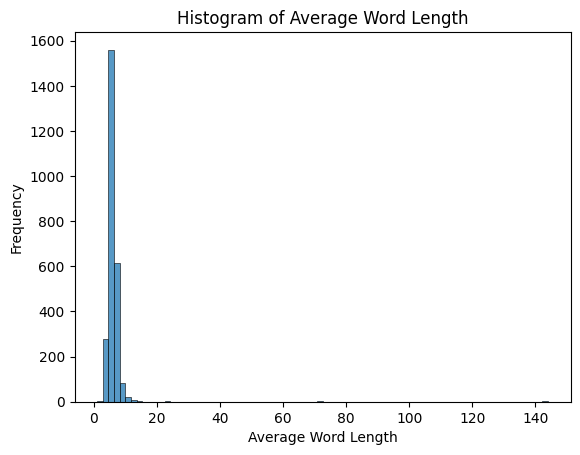

In [30]:
plot_reviews_word_average_histogram(reviews_df["review_text"])

O gráfico mostra que a maioria dos reviews tem média de 15 palavras.

### Most Frequently Stop Words

In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_stopwords_portuguese = nltk.corpus.stopwords.words("portuguese")

In [33]:
corpus = []
review_text = reviews_df["review_text"].str.split().values.tolist()
corpus = [word for i in review_text for word in i]

In [34]:
dic = defaultdict(int)
for word in corpus:
    if word.lower() in stop_stopwords_portuguese:
        dic[word] += 1

In [35]:
top_stopwords = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
top_stopwords_df = pd.DataFrame(top_stopwords, columns=["word", "frequency"])

In [36]:
top_stopwords_df.head()

,word,frequency
0,de,2166
1,e,1315
2,a,737
3,para,642
4,que,601


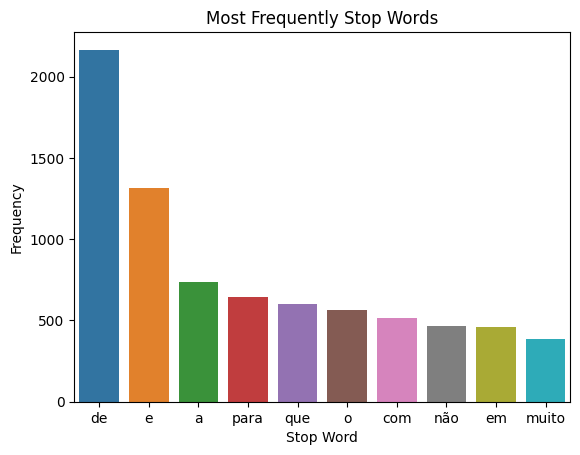

In [37]:
sns.barplot(data=top_stopwords_df, x="word", y="frequency")

plt.xlabel("Stop Word")
plt.ylabel("Frequency")
plt.title("Most Frequently Stop Words")
plt.show()

### Most Frequently Non Stop Words

In [38]:
counter = Counter(corpus)
most = counter.most_common()

top_non_stopwords = {}
for word, count in most[:40]:
    word_lower = word.lower()
    if word_lower not in stop_stopwords_portuguese:
        if word_lower not in top_non_stopwords:
            top_non_stopwords[word_lower] = count
        else:
            top_non_stopwords[word_lower] += count

top_non_stopwords = list(top_non_stopwords.items())

In [39]:
top_non_stopwords_df = pd.DataFrame(top_non_stopwords, columns=["word", "frequency"])

In [40]:
top_non_stopwords_df.sort_values(by=["frequency"], ascending=False, inplace=True)

In [41]:
top_non_stopwords_df.head()

,word,frequency
0,empresa,705
2,ambiente,315
1,trabalho,223
3,plano,195
4,crescimento,151


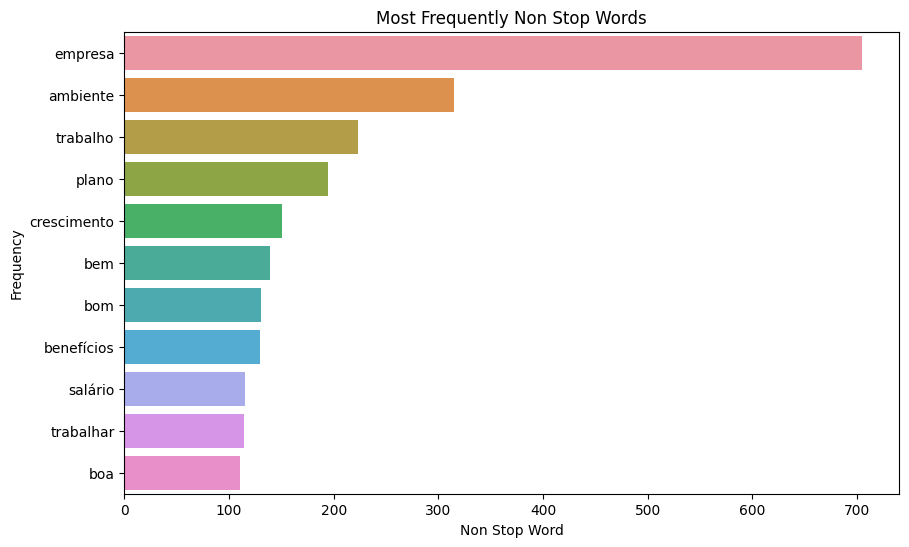

In [42]:
ax = plt.subplots(1, figsize=(10, 6))

ax = sns.barplot(data=top_non_stopwords_df, x="frequency", y="word")

plt.xlabel("Non Stop Word")
plt.ylabel("Frequency")
plt.title("Most Frequently Non Stop Words")
plt.show()

### N-Grams

In [43]:
def plot_top_ngrams_barchart(review_text, n_grams=2, top=10):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams)).fit(review_text)
    bag_of_words = vec.transform(review_text)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    top_n_grams = words_freq[:top]
    x, y = map(list, zip(*top_n_grams))

    sns.barplot(x=y, y=x)

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


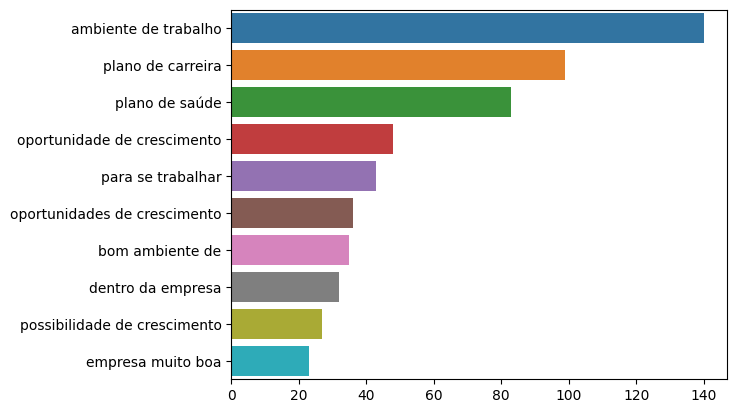

In [44]:
plot_top_ngrams_barchart(reviews_df["review_text"], n_grams=3, top=10)

### Wordcloud

In [45]:
corpus[:5]

['Companheirismo', 'entre', 'os', 'colegas,', 'oportunidade']

In [46]:
len(corpus)

37678

In [47]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
non_stopwords_corpus = []
for word in corpus:
    word_lower = word.lower()
    if word_lower not in stop_stopwords_portuguese and word_lower not in punctuation:
        non_stopwords_corpus.append(word_lower)

In [49]:
non_stopwords_corpus.sort(lambda x: x)

TypeError: sort() takes no positional arguments

In [ ]:
non_stopwords_corpus_str = " ".join(non_stopwords_corpus)

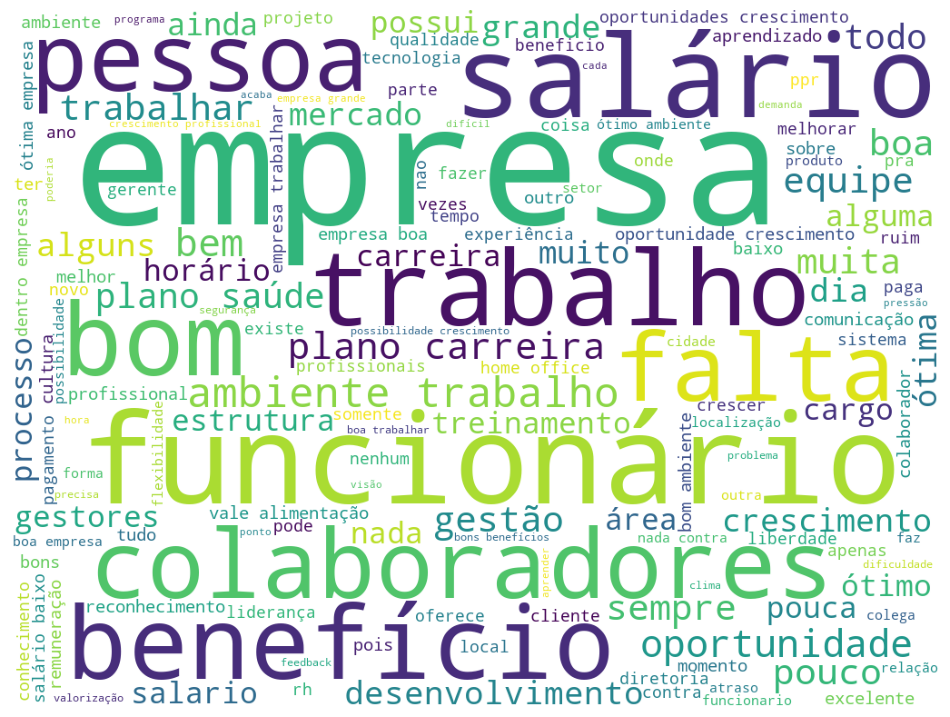

In [ ]:
wordcloud = WordCloud(
    background_color="white", random_state=103, max_words=150, width=1024, height=768
)

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")

plt.imshow(wordcloud.generate(str(non_stopwords_corpus_str)))

plt.show()

## Analyzing sentiment statistics

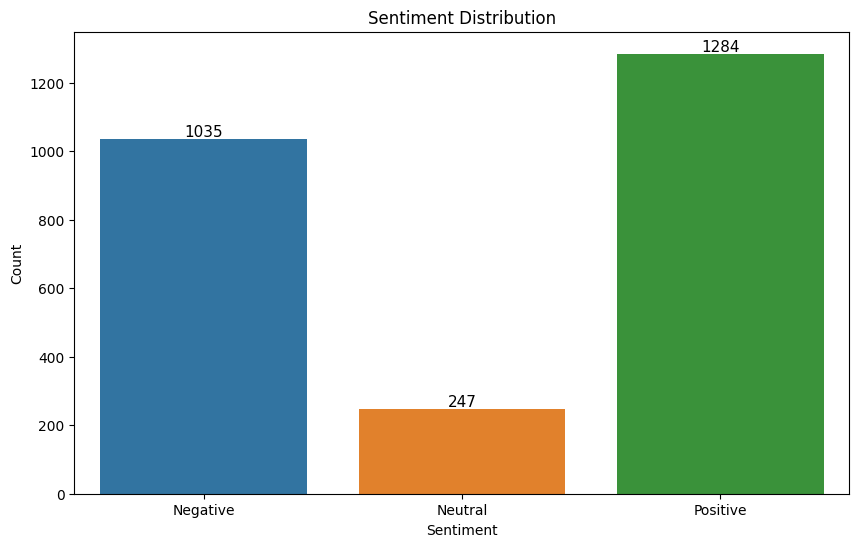

In [ ]:
ax = plt.subplots(1, figsize=(10, 6))
ax = sns.countplot(data=reviews_df, x="sentiment")

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.xlabel("Sentiment")
plt.ylabel("Count")

ax.set_xticklabels(["Negative", "Neutral", "Positive"])

plt.title("Sentiment Distribution")
plt.show()